In [111]:
# Data handling
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Text processing
import re
import string
import emoji

In [135]:
df = pd.read_csv("netflix_reviews.csv")

Let's get some initial information about the dataset.

In [129]:

print("Shape of the dataset:", df.shape) # 113609 rows, 8 columns
print("Columns in the dataset:", df.columns)

Shape of the dataset: (113609, 8)
Columns in the dataset: Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


We have 113609 and 8 columns.

The columns are the following:
- reviewId: ...
- userName: ...
- content: ...
- score: ...
- thumbsUpCount: ...
- reviewCreatedVersion: ...
- at: ...
- appVersion: ...

In [134]:
# Overview of the dataset.

df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,7dfb1f90-f185-4e81-a97f-d38f0128e5a4,Maxwell Ntloko,Good,5,1,NaN,2024-06-26 15:38:06,NaN
1,3009acc4-8554-41cf-88de-cc5e2f6e45b2,Dilhani Mahanama,👍👍,5,0,NaN,2024-06-24 15:29:54,NaN
2,b3d27852-9a3b-4f74-9e16-15434d3ee324,Karen Gulli,Good,3,0,NaN,2024-06-22 15:41:54,NaN
3,8be10073-2368-4677-b828-9ff5d06ea0b7,Ronny Magadi,"App is useful to certain phone brand ,,,,it is...",1,0,8.105.0 build 15 50626,2024-06-22 05:16:03,8.105.0 build 15 50626
4,9ac001b4-a47e-4aba-981f-4679345a9664,Hushikesh Suvakiya,Always promoting anti-Hindu shows.,1,8,NaN,2024-06-18 09:52:52,NaN


In [131]:
# You can see here that there are some null values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113609 entries, 0 to 113608
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              113609 non-null  object
 1   userName              113607 non-null  object
 2   content               113607 non-null  object
 3   score                 113609 non-null  int64 
 4   thumbsUpCount         113609 non-null  int64 
 5   reviewCreatedVersion  96971 non-null   object
 6   at                    113609 non-null  object
 7   appVersion            96971 non-null   object
dtypes: int64(2), object(6)
memory usage: 6.9+ MB


In [89]:
# Checking the numerical values. - This can be deleted. Useless.

df.describe()

,score,thumbsUpCount
count,113609.000000,113609.000000
mean,2.812620,10.434816
std,1.700549,101.013851
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8032.000000


In [133]:
# I want to check what is the latest review and the earliest review.

print(df['at'].min())

print(df['at'].max())

2018-09-12 07:22:12
2024-06-26 15:38:06


In [ ]:
# Check the missing values

df.isnull().sum()

In [136]:
# All the missing values are replaced with an empty string. We have to do this for the pre-processing later. Otherwise we get an error.

df.fillna('', inplace=True)

### Function for text pre-processing.

This is a good starting point.

In [137]:
def clean_text(text):

    # If data is missing
    # if isinstance(text, float):
    #    return ""

    # Convert text to lowercase
    text = text.lower()
    
    # Convert emojis to words
    text = emoji.demojize(text, delimiters=("", " "))
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Replace newline and tabs with a space
    text = re.sub(r'[\n\t]+', ' ', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


In [140]:
# Cleaning up the text. Applying it to the dataset. Creating a new column with the cleaned up review.

df['content_cleaned'] = df['content'].apply(clean_text)
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,content_c,content_cleaned
0,7dfb1f90-f185-4e81-a97f-d38f0128e5a4,Maxwell Ntloko,Good,5,1,,2024-06-26 15:38:06,,good,good
1,3009acc4-8554-41cf-88de-cc5e2f6e45b2,Dilhani Mahanama,👍👍,5,0,,2024-06-24 15:29:54,,thumbsup thumbsup,thumbsup thumbsup
2,b3d27852-9a3b-4f74-9e16-15434d3ee324,Karen Gulli,Good,3,0,,2024-06-22 15:41:54,,good,good
3,8be10073-2368-4677-b828-9ff5d06ea0b7,Ronny Magadi,"App is useful to certain phone brand ,,,,it is...",1,0,8.105.0 build 15 50626,2024-06-22 05:16:03,8.105.0 build 15 50626,app is useful to certain phone brand it is not...,app is useful to certain phone brand it is not...
4,9ac001b4-a47e-4aba-981f-4679345a9664,Hushikesh Suvakiya,Always promoting anti-Hindu shows.,1,8,,2024-06-18 09:52:52,,always promoting antihindu shows,always promoting antihindu shows


In [96]:
# There are no duplicates

df.duplicated().sum()

287

In [123]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,content_c
0,7dfb1f90-f185-4e81-a97f-d38f0128e5a4,Maxwell Ntloko,Good,5,1,,2024-06-26 15:38:06,,good
1,3009acc4-8554-41cf-88de-cc5e2f6e45b2,Dilhani Mahanama,👍👍,5,0,,2024-06-24 15:29:54,,thumbsup thumbsup
2,b3d27852-9a3b-4f74-9e16-15434d3ee324,Karen Gulli,Good,3,0,,2024-06-22 15:41:54,,good
3,8be10073-2368-4677-b828-9ff5d06ea0b7,Ronny Magadi,"App is useful to certain phone brand ,,,,it is...",1,0,8.105.0 build 15 50626,2024-06-22 05:16:03,8.105.0 build 15 50626,app is useful to certain phone brand it is not...
4,9ac001b4-a47e-4aba-981f-4679345a9664,Hushikesh Suvakiya,Always promoting anti-Hindu shows.,1,8,,2024-06-18 09:52:52,,always promoting antihindu shows


In [124]:
# Use the "at" column for actual time. Got to check pandas how it deals with this kind of stuff.
# It's a date format.

df['at'] = pd.to_datetime(df['at'])

In [125]:
# We don't need the enire dataset. Only these columns.

df = df[['reviewId', 'content_c', 'score', 'at']]
df.head()

,reviewId,content_c,score,at
0,7dfb1f90-f185-4e81-a97f-d38f0128e5a4,good,5,2024-06-26 15:38:06
1,3009acc4-8554-41cf-88de-cc5e2f6e45b2,thumbsup thumbsup,5,2024-06-24 15:29:54
2,b3d27852-9a3b-4f74-9e16-15434d3ee324,good,3,2024-06-22 15:41:54
3,8be10073-2368-4677-b828-9ff5d06ea0b7,app is useful to certain phone brand it is not...,1,2024-06-22 05:16:03
4,9ac001b4-a47e-4aba-981f-4679345a9664,always promoting antihindu shows,1,2024-06-18 09:52:52


### At this point the dataset is ready. Now I can do some data visualization. 

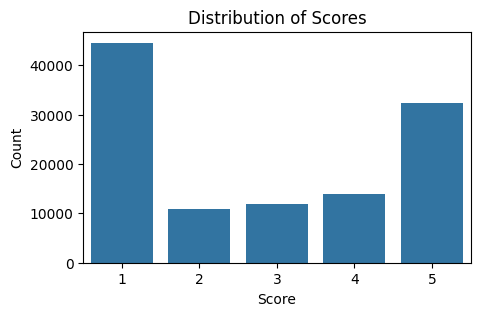

In [101]:
# analyzing score distribution
score_counts = df.score.value_counts().sort_index()
plt.figure(figsize=(5, 3))
sns.barplot(x=score_counts.index, y=score_counts.values)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

In [126]:
# If you want to replace the name of the columns

df.rename(columns={
    'reviewId':'ReviewID',
    'content_c':'Review',
    'score':'Rating',
    'at':'Year'
}, inplace=True)


In [127]:
df.head()

,ReviewID,Review,Rating,Year
0,7dfb1f90-f185-4e81-a97f-d38f0128e5a4,good,5,2024-06-26 15:38:06
1,3009acc4-8554-41cf-88de-cc5e2f6e45b2,thumbsup thumbsup,5,2024-06-24 15:29:54
2,b3d27852-9a3b-4f74-9e16-15434d3ee324,good,3,2024-06-22 15:41:54
3,8be10073-2368-4677-b828-9ff5d06ea0b7,app is useful to certain phone brand it is not...,1,2024-06-22 05:16:03
4,9ac001b4-a47e-4aba-981f-4679345a9664,always promoting antihindu shows,1,2024-06-18 09:52:52


### We need a way to translate the rating into an output value.

There are 2 options I guess.

#### Classification problem:

We can have the output be: +1 is positive, 0 is neutral, -1 is negative. Like having a "sigmoid" at the end and treating this as a classification problem.

#### Regression problem:

Treat the retings as a regression problem. So 1, 2, 3, 4, 5. I don't like this approach. 

In [104]:
# THIS IS JUST AN IDEA.

# Rating of 4, 5 -> Positive (+1)
# Rating of 3 -> Neutral     (0)
# Rating of 1, 2 -> Negative (-1)

# This is important. I have to actually check if this is the best way to do this.

def sentiment_labeler(rating):
    if(rating>=4):
        return 1
    elif(rating==3):
        return 0
    return -1

In [105]:
# Applying the thing and having the stuff. eheh xd. Extra column with the output.

df['Emotion'] = df['Rating'].apply(sentiment_labeler)

df.head()

,ReviewID,Review,Rating,Year,Emotion
0,7dfb1f90-f185-4e81-a97f-d38f0128e5a4,good,5,2024-06-26 15:38:06,1
1,3009acc4-8554-41cf-88de-cc5e2f6e45b2,👍👍,5,2024-06-24 15:29:54,1
2,b3d27852-9a3b-4f74-9e16-15434d3ee324,good,3,2024-06-22 15:41:54,0
3,8be10073-2368-4677-b828-9ff5d06ea0b7,app is useful to certain phone brand it is not...,1,2024-06-22 05:16:03,-1
4,9ac001b4-a47e-4aba-981f-4679345a9664,always promoting antihindu shows,1,2024-06-18 09:52:52,-1


In [106]:
df.head()

,ReviewID,Review,Rating,Year,Emotion
0,7dfb1f90-f185-4e81-a97f-d38f0128e5a4,good,5,2024-06-26 15:38:06,1
1,3009acc4-8554-41cf-88de-cc5e2f6e45b2,👍👍,5,2024-06-24 15:29:54,1
2,b3d27852-9a3b-4f74-9e16-15434d3ee324,good,3,2024-06-22 15:41:54,0
3,8be10073-2368-4677-b828-9ff5d06ea0b7,app is useful to certain phone brand it is not...,1,2024-06-22 05:16:03,-1
4,9ac001b4-a47e-4aba-981f-4679345a9664,always promoting antihindu shows,1,2024-06-18 09:52:52,-1


In [107]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the model and transform the data
X = vectorizer.fit_transform(df['Review'])

# Convert the result to a DataFrame for better visibility (optional)
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())